In [38]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [79]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules






In [80]:
df = pd.read_csv('churn_clean.csv')

In [81]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6058
The number of values for feature State :52
The number of values for feature County :1620
The number of values for feature Zip :8583
The number of values for feature Lat :8563
The number of values for feature Lng :8630
The number of values for feature Population :5933
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :25 -- ['America/Anchorage' 'America/Boise' 'America/Chicago' 'America/Denver'
 'America/Detroit' 'America/Indiana/Indianapolis' 'America/Indiana/Knox'
 'America/Indiana/Marengo' 'America/Indiana/Petersburg'
 'America/Indiana/Tell_City' 'America/Indiana/Vincennes'
 'America/Indiana/Winamac' 'America/Juneau' 'America/Kentucky/Louisville'
 'America/Los_Angeles' 'America/Meno

In [82]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [83]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [84]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', \
         'UID', 'City','County', 'Zip', 'Lat', 'Lng',\
         'County', 'Zip', 'Lat', 'Lng', 'TimeZone',\
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8','State','Population',\
        'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',\
        'Tenure', 'MonthlyCharge','Bandwidth_GB_Year'], axis = 1)

In [85]:
df.head()

,Area,Job,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Urban,Environmental health practitioner,Widowed,Male,No,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic)
1,Urban,"Programmer, multimedia",Married,Female,Yes,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic)
2,Urban,Chief Financial Officer,Widowed,Female,No,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic)
3,Suburban,Solicitor,Married,Male,No,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check
4,Suburban,Medical illustrator,Separated,Male,Yes,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check


In [86]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Job :639
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature Churn :2 -- ['No' 'Yes']
The number of values for feature Techie :2 -- ['No' 'Yes']
The number of values for feature Contract :3 -- ['Month-to-month' 'One year' 'Two Year']
The number of values for feature Port_modem :2 -- ['No' 'Yes']
The number of values for feature Tablet :2 -- ['No' 'Yes']
The number of values for feature InternetService :3 -- ['DSL' 'Fiber Optic' 'None']
The number of values for feature Phone :2 -- ['No' 'Yes']
The number of values for feature Multiple :2 -- ['No' 'Yes']
The number of values for feature OnlineSecurity :2 -- ['No' 'Yes']
The number of values for feature OnlineBackup :2 -- ['No' 'Yes']
The number of values for feature Devic

In [87]:
df.shape

(10000, 20)

In [88]:
#df = pd.get_dummies(df,drop_first=True)
df = pd.get_dummies(df)

In [89]:
df

,Area_Rural,Area_Suburban,Area_Urban,Job_Academic librarian,Job_Accommodation manager,"Job_Accountant, chartered","Job_Accountant, chartered certified","Job_Accountant, chartered management","Job_Accountant, chartered public finance",Job_Accounting technician,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
9997,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
9998,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [90]:
df.shape

(10000, 686)

#This section would have been used if the items were in one column.

#encoder = TransactionEncoder().fit(df)
#onehot = encoder.transform(df)
#onehot = encoder.transform(df)

In [91]:
frequent_items = apriori(df, min_support = .0005, max_len = 3, use_colnames = True)

In [92]:
print(len(frequent_items))

155245


In [93]:
print(frequent_items.head())

   support                     itemsets
0   0.3327                 (Area_Rural)
1   0.3346              (Area_Suburban)
2   0.3327                 (Area_Urban)
3   0.0020     (Job_Academic librarian)
4   0.0018  (Job_Accommodation manager)


In [94]:
rules = association_rules(frequent_items)

In [95]:
print(rules)

                                             antecedents   consequents  \
0                                           (Area_Rural)   (Techie_No)   
1                                           (Area_Rural)   (Phone_Yes)   
2                                        (Area_Suburban)   (Techie_No)   
3                                        (Area_Suburban)   (Phone_Yes)   
4             (Job_Control and instrumentation engineer)  (Area_Urban)   
...                                                  ...           ...   
64909  (PaymentMethod_Mailed Check, PaperlessBilling_No)   (Phone_Yes)   
64910  (PaperlessBilling_Yes, PaymentMethod_Bank Tran...   (Phone_Yes)   
64911  (PaperlessBilling_Yes, PaymentMethod_Credit Ca...   (Phone_Yes)   
64912  (PaperlessBilling_Yes, PaymentMethod_Electroni...   (Phone_Yes)   
64913  (PaymentMethod_Mailed Check, PaperlessBilling_...   (Phone_Yes)   

       antecedent support  consequent support  support  confidence      lift  \
0                  0.3327      

In [96]:
print(frequent_items)

        support                                           itemsets
0        0.3327                                       (Area_Rural)
1        0.3346                                    (Area_Suburban)
2        0.3327                                       (Area_Urban)
3        0.0020                           (Job_Academic librarian)
4        0.0018                        (Job_Accommodation manager)
...         ...                                                ...
155240   0.0465  (PaymentMethod_Mailed Check, PaperlessBilling_...
155241   0.0618  (PaperlessBilling_Yes, PaymentMethod_Bank Tran...
155242   0.0620  (PaperlessBilling_Yes, PaymentMethod_Credit Ca...
155243   0.0988  (PaperlessBilling_Yes, PaymentMethod_Electroni...
155244   0.0652  (PaymentMethod_Mailed Check, PaperlessBilling_...

[155245 rows x 2 columns]


In [97]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [98]:
filtered_rules = rules[(rules['antecedent support'] > .01) &
                       (rules['support'] > .009) & 
                       (rules['confidence'] > .85) &
                        (rules['lift'] > 1.00)]

In [99]:
print(filtered_rules)

                                             antecedents  consequents  \
1                                           (Area_Rural)  (Phone_Yes)   
3                                        (Area_Suburban)  (Phone_Yes)   
1648                                  (Marital_Divorced)  (Phone_Yes)   
1650                                   (Marital_Married)  (Phone_Yes)   
1660                                       (Gender_Male)  (Phone_Yes)   
...                                                  ...          ...   
64904  (StreamingMovies_Yes, PaymentMethod_Electronic...  (Phone_Yes)   
64906  (PaperlessBilling_No, PaymentMethod_Bank Trans...  (Phone_Yes)   
64908  (PaperlessBilling_No, PaymentMethod_Electronic...  (Phone_Yes)   
64909  (PaymentMethod_Mailed Check, PaperlessBilling_No)  (Phone_Yes)   
64912  (PaperlessBilling_Yes, PaymentMethod_Electroni...  (Phone_Yes)   

       antecedent support  consequent support  support  confidence      lift  \
1                  0.3327              0.90

In [100]:
filtered_rules['lhs items'] = filtered_rules['antecedents'].apply(lambda x:len(x))
filtered_rules[filtered_rules['lhs items']>1].sort_values('lift', ascending=False).head()

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
63940,"(Contract_Two Year, Churn_Yes)",(StreamingMovies_Yes),0.0309,0.4890,0.0274,0.886731,1.813357,0.012290,4.511400,2
63937,"(Contract_One year, Churn_Yes)",(StreamingMovies_Yes),0.0307,0.4890,0.0269,0.876221,1.791864,0.011888,4.128342,2
63934,"(StreamingMovies_No, Churn_Yes)",(Contract_Month-to-month),0.0716,0.5456,0.0643,0.898045,1.645976,0.025235,4.456855,2
63933,"(StreamingTV_No, Churn_Yes)",(Contract_Month-to-month),0.0836,0.5456,0.0729,0.872010,1.598258,0.027288,3.550265,2
63833,"(StreamingMovies_No, Contract_Two Year)",(Churn_No),0.1263,0.7350,0.1228,0.972288,1.322841,0.029970,9.562714,2


/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


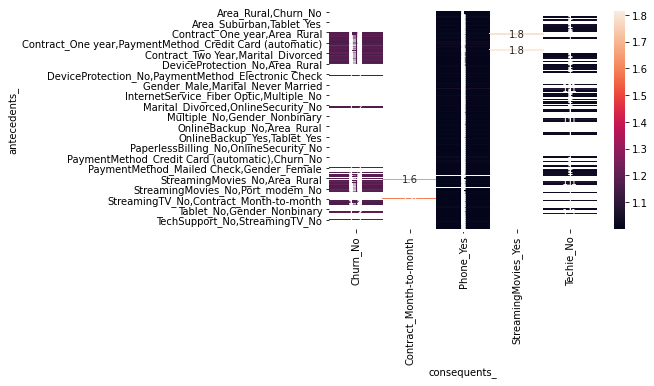

In [101]:
import seaborn as sns
# Replace frozen sets with strings
filtered_rules['antecedents_'] = filtered_rules['antecedents'].apply(lambda a: ','.join(list(a)))
filtered_rules['consequents_'] = filtered_rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = filtered_rules[filtered_rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [102]:
itemsets = filtered_rules['antecedents_'] + '->' + filtered_rules['consequents_'] 

In [103]:
itemsets

1                                    Area_Rural->Phone_Yes
3                                 Area_Suburban->Phone_Yes
1648                           Marital_Divorced->Phone_Yes
1650                            Marital_Married->Phone_Yes
1660                                Gender_Male->Phone_Yes
                               ...                        
64904    StreamingMovies_Yes,PaymentMethod_Electronic C...
64906    PaperlessBilling_No,PaymentMethod_Bank Transfe...
64908    PaperlessBilling_No,PaymentMethod_Electronic C...
64909    PaymentMethod_Mailed Check,PaperlessBilling_No...
64912    PaperlessBilling_Yes,PaymentMethod_Electronic ...
Length: 659, dtype: object

In [104]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
1,(Area_Rural),(Phone_Yes),0.3327,0.9067,0.3030,0.910730,1.004445,0.001341,1.045148,1,Area_Rural,Phone_Yes
3,(Area_Suburban),(Phone_Yes),0.3346,0.9067,0.3039,0.908249,1.001708,0.000518,1.016879,1,Area_Suburban,Phone_Yes
1648,(Marital_Divorced),(Phone_Yes),0.2092,0.9067,0.1900,0.908222,1.001678,0.000318,1.016581,1,Marital_Divorced,Phone_Yes
1650,(Marital_Married),(Phone_Yes),0.1911,0.9067,0.1756,0.918891,1.013445,0.002330,1.150299,1,Marital_Married,Phone_Yes
1660,(Gender_Male),(Phone_Yes),0.4744,0.9067,0.4304,0.907251,1.000608,0.000262,1.005944,1,Gender_Male,Phone_Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
64904,"(StreamingMovies_Yes, PaymentMethod_Electronic...",(Phone_Yes),0.1664,0.9067,0.1511,0.908053,1.001492,0.000225,1.014714,2,"StreamingMovies_Yes,PaymentMethod_Electronic C...",Phone_Yes
64906,"(PaperlessBilling_No, PaymentMethod_Bank Trans...",(Phone_Yes),0.0906,0.9067,0.0825,0.910596,1.004297,0.000353,1.043578,2,"PaperlessBilling_No,PaymentMethod_Bank Transfe...",Phone_Yes
64908,"(PaperlessBilling_No, PaymentMethod_Electronic...",(Phone_Yes),0.1390,0.9067,0.1267,0.911511,1.005306,0.000669,1.054366,2,"PaperlessBilling_No,PaymentMethod_Electronic C...",Phone_Yes
64909,"(PaymentMethod_Mailed Check, PaperlessBilling_No)",(Phone_Yes),0.0968,0.9067,0.0888,0.917355,1.011752,0.001031,1.128930,2,"PaymentMethod_Mailed Check,PaperlessBilling_No",Phone_Yes


In [105]:
x = filtered_rules[filtered_rules['consequents_'] == 'Phone_Yes']

In [106]:
x

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
1,(Area_Rural),(Phone_Yes),0.3327,0.9067,0.3030,0.910730,1.004445,0.001341,1.045148,1,Area_Rural,Phone_Yes
3,(Area_Suburban),(Phone_Yes),0.3346,0.9067,0.3039,0.908249,1.001708,0.000518,1.016879,1,Area_Suburban,Phone_Yes
1648,(Marital_Divorced),(Phone_Yes),0.2092,0.9067,0.1900,0.908222,1.001678,0.000318,1.016581,1,Marital_Divorced,Phone_Yes
1650,(Marital_Married),(Phone_Yes),0.1911,0.9067,0.1756,0.918891,1.013445,0.002330,1.150299,1,Marital_Married,Phone_Yes
1660,(Gender_Male),(Phone_Yes),0.4744,0.9067,0.4304,0.907251,1.000608,0.000262,1.005944,1,Gender_Male,Phone_Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
64904,"(StreamingMovies_Yes, PaymentMethod_Electronic...",(Phone_Yes),0.1664,0.9067,0.1511,0.908053,1.001492,0.000225,1.014714,2,"StreamingMovies_Yes,PaymentMethod_Electronic C...",Phone_Yes
64906,"(PaperlessBilling_No, PaymentMethod_Bank Trans...",(Phone_Yes),0.0906,0.9067,0.0825,0.910596,1.004297,0.000353,1.043578,2,"PaperlessBilling_No,PaymentMethod_Bank Transfe...",Phone_Yes
64908,"(PaperlessBilling_No, PaymentMethod_Electronic...",(Phone_Yes),0.1390,0.9067,0.1267,0.911511,1.005306,0.000669,1.054366,2,"PaperlessBilling_No,PaymentMethod_Electronic C...",Phone_Yes
64909,"(PaymentMethod_Mailed Check, PaperlessBilling_No)",(Phone_Yes),0.0968,0.9067,0.0888,0.917355,1.011752,0.001031,1.128930,2,"PaymentMethod_Mailed Check,PaperlessBilling_No",Phone_Yes


In [107]:
filtered_rules['consequents_'].unique()

array(['Phone_Yes', 'Techie_No', 'Churn_No', 'Contract_Month-to-month',
       'StreamingMovies_Yes'], dtype=object)

In [108]:
x = filtered_rules[filtered_rules['consequents_'] == 'Churn_No']

In [109]:
x

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
1664,(Contract_One year),(Churn_No),0.2102,0.735,0.1795,0.853949,1.161835,0.025003,1.814430,1,Contract_One year,Churn_No
1665,(Contract_Two Year),(Churn_No),0.2442,0.735,0.2133,0.873464,1.188387,0.033813,2.094272,1,Contract_Two Year,Churn_No
1668,(StreamingMovies_No),(Churn_No),0.5110,0.735,0.4394,0.859883,1.169908,0.063815,1.891271,1,StreamingMovies_No,Churn_No
3141,"(Contract_One year, Area_Rural)",(Churn_No),0.0707,0.735,0.0607,0.858557,1.168105,0.008736,1.873550,2,"Contract_One year,Area_Rural",Churn_No
3142,"(Contract_Two Year, Area_Rural)",(Churn_No),0.0813,0.735,0.0720,0.885609,1.204910,0.012244,2.316613,2,"Contract_Two Year,Area_Rural",Churn_No
...,...,...,...,...,...,...,...,...,...,...,...,...
63916,"(StreamingMovies_No, PaperlessBilling_No)",(Churn_No),0.2106,0.735,0.1810,0.859449,1.169319,0.026209,1.885439,2,"StreamingMovies_No,PaperlessBilling_No",Churn_No
63917,"(StreamingMovies_No, PaperlessBilling_Yes)",(Churn_No),0.3004,0.735,0.2584,0.860186,1.170322,0.037606,1.895381,2,"StreamingMovies_No,PaperlessBilling_Yes",Churn_No
63918,"(StreamingMovies_No, PaymentMethod_Bank Transf...",(Churn_No),0.1167,0.735,0.1011,0.866324,1.178672,0.015325,1.982404,2,"StreamingMovies_No,PaymentMethod_Bank Transfer...",Churn_No
63919,"(StreamingMovies_No, PaymentMethod_Credit Card...",(Churn_No),0.1036,0.735,0.0892,0.861004,1.171434,0.013054,1.906528,2,"StreamingMovies_No,PaymentMethod_Credit Card (...",Churn_No


In [110]:
x.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
63833,"(StreamingMovies_No, Contract_Two Year)",(Churn_No),0.1263,0.735,0.1228,0.972288,1.322841,0.029970,9.562714,2,"StreamingMovies_No,Contract_Two Year",Churn_No
63805,"(Contract_One year, StreamingMovies_No)",(Churn_No),0.1078,0.735,0.1040,0.964750,1.312584,0.024767,7.517632,2,"Contract_One year,StreamingMovies_No",Churn_No
63832,"(Contract_Two Year, StreamingTV_No)",(Churn_No),0.1234,0.735,0.1178,0.954619,1.298802,0.027101,5.839464,2,"Contract_Two Year,StreamingTV_No",Churn_No
63804,"(Contract_One year, StreamingTV_No)",(Churn_No),0.1021,0.735,0.0970,0.950049,1.292584,0.021957,5.305196,2,"Contract_One year,StreamingTV_No",Churn_No
63909,"(StreamingMovies_No, StreamingTV_No)",(Churn_No),0.2565,0.735,0.2364,0.921637,1.253928,0.047872,3.381716,2,"StreamingMovies_No,StreamingTV_No",Churn_No


In [78]:
df.to_csv('cleaned_data.csv', index=False)

### Everything below this cell is with the accurate dataset, for this task we would not be using 'churn'

In [189]:
df = pd.read_csv('teleco_market_basket.csv')

In [190]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df = df.dropna(how='all')

In [192]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df = pd.get_dummies(df, prefix='', prefix_sep='')

In [194]:
df

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,HOVAMP iPhone charger,SanDisk Ultra 128GB card,USB 2.0 Printer cable,Brother Genuine High Yield Toner Cartridge,FEEL2NICE 5 pack 10ft Lighning cable,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,NETGEAR Nighthawk WiFi Router,iPhone Charger Cable Anker 6ft,FEIYOLD Blue light Blocking Glasses
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df.columns

Index(['10ft iPHone Charger Cable', '10ft iPHone Charger Cable 2 Pack',
       '3 pack Nylon Braided Lightning Cable',
       '3A USB Type C Cable 3 pack 6FT', '5pack Nylon Braided USB C cables',
       'ARRIS SURFboard SB8200 Cable Modem', 'Anker 2-in-1 USB Card Reader',
       'Anker 4-port USB hub', 'Anker USB C to HDMI Adapter',
       'Apple Lightning to Digital AV Adapter',
       ...
       'HOVAMP iPhone charger', 'SanDisk Ultra 128GB card',
       'USB 2.0 Printer cable', 'Brother Genuine High Yield Toner Cartridge',
       'FEEL2NICE 5 pack 10ft Lighning cable', 'SanDisk Ultra 128GB card',
       'FEEL2NICE 5 pack 10ft Lighning cable', 'NETGEAR Nighthawk WiFi Router',
       'iPhone Charger Cable Anker 6ft',
       'FEIYOLD Blue light Blocking Glasses'],
      dtype='object', length=1268)

In [196]:
frequent_items = apriori(df, min_support = .0005, max_len = 3, use_colnames = True)

In [197]:
print(len(frequent_items))

5394


In [199]:
print(frequent_items.head())

    support                              itemsets
0  0.000933           (10ft iPHone Charger Cable)
1  0.010399    (10ft iPHone Charger Cable 2 Pack)
2  0.003866      (3A USB Type C Cable 3 pack 6FT)
3  0.000933    (5pack Nylon Braided USB C cables)
4  0.000667  (ARRIS SURFboard SB8200 Cable Modem)


In [200]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [201]:
print(rules)

                                            antecedents  \
0                                        (Apple Pencil)   
1                    (10ft iPHone Charger Cable 2 Pack)   
2                    (10ft iPHone Charger Cable 2 Pack)   
3                 (FEIYOLD Blue light Blocking Glasses)   
4                    (10ft iPHone Charger Cable 2 Pack)   
...                                                 ...   
4509  (FEIYOLD Blue light Blocking Glasses, Screen M...   
4510   (HP 65 ink, FEIYOLD Blue light Blocking Glasses)   
4511                    (Screen Mom Screen Cleaner kit)   
4512                                        (HP 65 ink)   
4513              (FEIYOLD Blue light Blocking Glasses)   

                                            consequents  antecedent support  \
0                    (10ft iPHone Charger Cable 2 Pack)            0.000800   
1                                        (Apple Pencil)            0.001466   
2                 (FEIYOLD Blue light Blocking Glasses

In [202]:
print(frequent_items)

       support                                           itemsets
0     0.000933                        (10ft iPHone Charger Cable)
1     0.010399                 (10ft iPHone Charger Cable 2 Pack)
2     0.003866                   (3A USB Type C Cable 3 pack 6FT)
3     0.000933                 (5pack Nylon Braided USB C cables)
4     0.000667               (ARRIS SURFboard SB8200 Cable Modem)
...        ...                                                ...
5389  0.000533  (Dust-Off Compressed Gas 2 pack, Screen Mom Sc...
5390  0.000533    (HP 61 ink, HP 63XL Ink, USB 2.0 Printer cable)
5391  0.000533  (SanDisk Ultra 128GB card, HP 61 ink, USB 2.0 ...
5392  0.000533  (Dust-Off Compressed Gas 2 pack, SanDisk Ultra...
5393  0.000533  (Screen Mom Screen Cleaner kit, HP 65 ink, FEI...

[5394 rows x 2 columns]


In [203]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [204]:
filtered_rules = rules[(rules['antecedent support'] > .01) &
                       (rules['support'] > .009) & 
                       (rules['confidence'] > .85) &
                        (rules['lift'] > 1.00)]

In [205]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,(Apple Lightning to Digital AV Adapter),(Cat8 Ethernet Cable),0.010399,0.001466,0.009865,0.948718,646.939394,0.00985,19.471404


In [206]:
filtered_rules['lhs items'] = filtered_rules['antecedents'].apply(lambda x:len(x))
filtered_rules[filtered_rules['lhs items']>1].sort_values('lift', ascending=False).head()

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items


In [207]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
82,(Apple Lightning to Digital AV Adapter),(Cat8 Ethernet Cable),0.010399,0.001466,0.009865,0.948718,646.939394,0.00985,19.471404,1


In [208]:
rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
982,(HP 63XL Ink),(USB 2.0 Printer cable),0.000533,0.000533,0.001067,2.00,3750.50,0.001066,inf
983,(USB 2.0 Printer cable),(HP 63XL Ink),0.000533,0.000533,0.001067,2.00,3750.50,0.001066,inf
533,(SanDisk 128GB Ultra microSDXC card),(Jelly Comb 2.4G Slim Wireless mouse),0.000667,0.000533,0.001200,1.80,3375.45,0.001199,inf
2729,(Dust-Off Compressed Gas 2 pack),"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",0.000667,0.000533,0.001200,1.80,3375.45,0.001199,inf
2728,"(HP 61 ink, VIVO Dual LCD Monitor Desk mount)",(Dust-Off Compressed Gas 2 pack),0.000533,0.000667,0.001200,2.25,3375.45,0.001199,inf


In [209]:
rules.sort_values('antecedent support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2021,(Apple Lightning to Digital AV Adapter),"(Nylon Braided Lightning to USB cable, VIVO Du...",0.010399,0.000533,0.000800,0.076923,144.250000,0.000794,1.082756
82,(Apple Lightning to Digital AV Adapter),(Cat8 Ethernet Cable),0.010399,0.001466,0.009865,0.948718,646.939394,0.009850,19.471404
110,(Apple Lightning to Digital AV Adapter),(SAMSUNG 128GB card),0.010399,0.000933,0.000800,0.076923,82.428571,0.000790,1.082322
1871,(Apple Lightning to Digital AV Adapter),"(Apple USB-C Charger cable, Anker USB C to HDM...",0.010399,0.000533,0.000533,0.051282,96.166667,0.000528,1.053492
112,(Apple Lightning to Digital AV Adapter),(SAMSUNG EVO 32GB card),0.010399,0.002800,0.001067,0.102564,36.634921,0.001037,1.111166


In [210]:
rules.sort_values('support', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(Cat8 Ethernet Cable),(Apple Lightning to Digital AV Adapter),0.001466,0.010399,0.009865,6.727273,646.939394,0.009850,inf
82,(Apple Lightning to Digital AV Adapter),(Cat8 Ethernet Cable),0.010399,0.001466,0.009865,0.948718,646.939394,0.009850,19.471404
104,(Apple Lightning to Digital AV Adapter),(Mpow HC6 USB Headset),0.010399,0.000667,0.003999,0.384615,577.000000,0.003993,1.623917
105,(Mpow HC6 USB Headset),(Apple Lightning to Digital AV Adapter),0.000667,0.010399,0.003999,6.000000,577.000000,0.003993,inf
695,(Anker USB C to HDMI Adapter),(Nylon Braided Lightning to USB cable),0.004933,0.002400,0.003200,0.648649,270.306306,0.003188,2.839324


In [211]:
rules.sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(Cat8 Ethernet Cable),(Apple Lightning to Digital AV Adapter),0.001466,0.010399,0.009865,6.727273,646.939394,0.009850,inf
105,(Mpow HC6 USB Headset),(Apple Lightning to Digital AV Adapter),0.000667,0.010399,0.003999,6.000000,577.000000,0.003993,inf
504,(HP 63XL Ink),(iPhone 11 case),0.000533,0.001600,0.002133,4.000000,2500.333333,0.002132,inf
247,(Mpow HC6 USB Headset),(Cat8 Ethernet Cable),0.000667,0.001466,0.002533,3.800000,2591.254545,0.002532,inf
3999,"(SanDisk Ultra 64GB card, FEIYOLD Blue light B...",(VIVO Dual LCD Monitor Desk mount),0.000533,0.001067,0.001600,3.000000,2812.875000,0.001599,inf


In [212]:
filtered_rules = rules[(rules['support'] > .002) & 
                       (rules['confidence'] > .85) &
                        (rules['lift'] > 1.00)]

In [213]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,(Apple Lightning to Digital AV Adapter),(Cat8 Ethernet Cable),0.010399,0.001466,0.009865,0.948718,646.939394,0.009850,19.471404
83,(Cat8 Ethernet Cable),(Apple Lightning to Digital AV Adapter),0.001466,0.010399,0.009865,6.727273,646.939394,0.009850,inf
105,(Mpow HC6 USB Headset),(Apple Lightning to Digital AV Adapter),0.000667,0.010399,0.003999,6.000000,577.000000,0.003993,inf
232,(Cat8 Ethernet Cable),(Anker USB C to HDMI Adapter),0.001466,0.004933,0.002266,1.545455,313.309582,0.002259,inf
246,(Cat8 Ethernet Cable),(Mpow HC6 USB Headset),0.001466,0.000667,0.002533,1.727273,2591.254545,0.002532,inf
247,(Mpow HC6 USB Headset),(Cat8 Ethernet Cable),0.000667,0.001466,0.002533,3.800000,2591.254545,0.002532,inf
504,(HP 63XL Ink),(iPhone 11 case),0.000533,0.001600,0.002133,4.000000,2500.333333,0.002132,inf
505,(iPhone 11 case),(HP 63XL Ink),0.001600,0.000533,0.002133,1.333333,2500.333333,0.002132,inf
694,(Nylon Braided Lightning to USB cable),(Anker USB C to HDMI Adapter),0.002400,0.004933,0.003200,1.333333,270.306306,0.003188,inf


In [214]:
df.to_csv('cleaned_data.csv', index=False)